# Elisabeth Victoria Nilasari

## Markov Chain Implementation

Reference from Github [Ravissement](https://github.com/ravissement/MarkovChain)

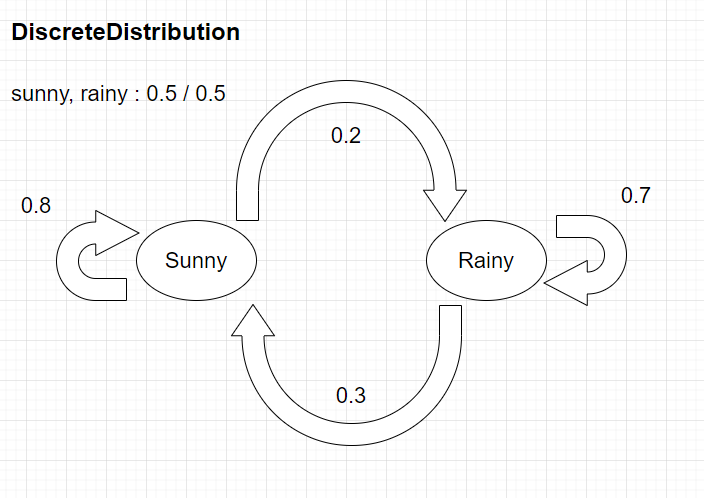

## Original Code

In [ ]:
from pomegranate import *

# Define starting probabilities
# we'll say it's sunny 50% the time, rainy 50% of the time.
start = DiscreteDistribution({
    "sun": 0.5,
    "rain": 0.5
})

# Define transition model
# How to move from one day to the next.
# that if was sunny today. the with probability 0.8
# it will be sunny tomorrow,
# and it will be raining tommorw with probability 0.2
transitions = ConditionalProbabilityTable([
    ["sun", "sun", 0.8],
    ["sun", "rain", 0.2],
    ["rain", "sun", 0.3],
    ["rain", "rain", 0.7]
], [start])

# Create Markov chain
model = MarkovChain([start, transitions])

# Sample 50 states from chain
# it's just going to randomly sample.
# and you can imagine sampling many times to be able to get more data to be able to more analysis.
print(model.sample(50))

The code above implements a simple **Markov** chain using the **Pomegranate library** to simulate weather patterns with two possible conditions: **sunny and rainy**.

The code begins by defining the initial probabilities, assuming an equal 50% chance for both weather conditions. 
Then, it sets the transition probabilities that determine how the weather changes from one day to the next:

- if today is sunny, there's an 80% chance it will remain sunny tomorrow and a 20% chance it will change to rainy.
- if today is rainy, there's a 70% chance it will remain rainy and a 30% chance it will become sunny.

These transitions form the core of the Markov chain, where the next state depends only on the current state. The model is then used to generate a sample sequence over 50 days, which randomly simulates daily weather based on the defined probabilities. This approach helps illustrate how probabilistic models can mimic real-world processes where outcomes are uncertain but influenced by current conditions.

## My Modified Code

I modified the code above because the I couldn't use the Pomegranate library

In [ ]:
import numpy as np

states = ["sun", "rain"]
state_to_index = {state: i for i, state in enumerate(states)}
index_to_state = {i: state for i, state in enumerate(states)}

# Define initial probabilities (initial state)
# Corresponding to P(state_0 = "sun"), P(state_0 = "rain")
initial_probabilities = np.array([0.5, 0.5])

# Define the transition matrix
# transition_matrix[i, j] is the transition probability from state i to state j
# Rows represent the current state (0: sun, 1: rain)
# Columns represent the next state (0: sun, 1: rain)
transition_matrix = np.array([
    [0.8, 0.2],  # From sun: P(to sun), P(to rain)
    [0.3, 0.7]   # From rain: P(to sun), P(to rain)
])

# ---------- Part 1: Markov Chain Simulation ----------

# Number of states to simulate
num_samples = 50

# Start from the initial state
# Use np.random.choice to select the initial state based on initial probabilities
current_state_index = np.random.choice(len(states), p=initial_probabilities)

# List to store the sequence of generated state indices
sampled_sequence_indices = [current_state_index]

# Generate the rest of the state sequence
for _ in range(num_samples - 1):
    # Get transition probabilities from the current state
    # This is the row in the transition matrix corresponding to the current state
    probabilities_from_current_state = transition_matrix[current_state_index, :]

    # Sample the next state based on those probabilities
    next_state_index = np.random.choice(len(states), p=probabilities_from_current_state)

    # Add the next state to the sequence
    sampled_sequence_indices.append(next_state_index)

    # Update the current state
    current_state_index = next_state_index

# Convert the sequence of state indices to state names
sampled_sequence_states = [index_to_state[i] for i in sampled_sequence_indices]

# Count the number of sunny and rainy states
sun_count = sampled_sequence_states.count("sun")
rain_count = sampled_sequence_states.count("rain")

# Print the generated state sequence
print(sampled_sequence_states)

# Print the counts
print()
print(f"\nNumber of sunny days: {sun_count}")
print(f"Number of rainy days: {rain_count}")

# ---------- Part 2: Calculate steady state mathematically ----------

print("\nSteady state calculation:")
epsilon = 0.0001
max_iterations = 100
current_state = initial_probabilities.copy()

for step in range(1, max_iterations + 1):
    next_state = current_state @ transition_matrix
    delta = np.abs(next_state - current_state)
    max_delta = np.max(delta)

    print(f"Step {step}: {next_state.round(6)} | Δ = {max_delta:.6f}")

    if max_delta < epsilon:
        print(f"\n✅ Steady state reached at step {step}: {next_state.round(6)}")
        break

    current_state = next_state
else:
    print("⚠️ Steady state not reached within max iterations.")

['rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain']


Number of sunny days: 28
Number of rainy days: 22

Steady state calculation:
Step 1: [0.55 0.45] | Δ = 0.050000
Step 2: [0.575 0.425] | Δ = 0.025000
Step 3: [0.5875 0.4125] | Δ = 0.012500
Step 4: [0.59375 0.40625] | Δ = 0.006250
Step 5: [0.596875 0.403125] | Δ = 0.003125
Step 6: [0.598438 0.401562] | Δ = 0.001563
Step 7: [0.599219 0.400781] | Δ = 0.000781
Step 8: [0.599609 0.400391] | Δ = 0.000391
Step 9: [0.599805 0.400195] | Δ = 0.000195
Step 10: [0.599902 0.400098] | Δ = 0.000098

✅ Steady state reached at step 10: [0.599902 0.400098]


---
## Program Analysis

---

### Problem

Imagine a city like **Jogja**, facing unpredictable weather this year. The climate tends to randomly switch between **sunny** and **rainy** days, making it tough to predict tomorrow's weather just by looking at today's. To help analyze this uncertainty, I want to model the weather transitions over time in a simple, data-driven way.

---

### Objective

The goal of this program is to simulate weather patterns using a **Markov chain** model. It aims to estimate weather transition probabilities—like from sunny to rainy or rainy to sunny—and then generate a realistic sequence of weather based on these probabilities. This kind of simulation can be useful for forecasting, planning, or understanding long-term climate behavior in a simplified manner.

---

### Model

The model used is a first-order **Markov chain** with two possible weather conditions: "**sun**" and "**rain**." The simulation starts with a 50/50 chance for either weather type.

It then uses a **transition matrix** that defines the probabilities of moving from one weather condition to another. For example, if it's sunny today, there's an 80% chance it will also be sunny tomorrow and a 20% chance it will rain. This transition model is implemented using **NumPy**, and a 50-day weather sequence is generated based on these rules.

---

### Results

The program outputs a sequence of **50 simulated weather states** (either sunny or rainy), representing 50 days of weather in Jogja. Additionally, it prints the total number of **sunny days** and **rainy days** within the simulation. This provides a basic overview of how often each weather type occurs, based on the defined transition probabilities.